In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = IMAGE_SHAPE + (3,))
])

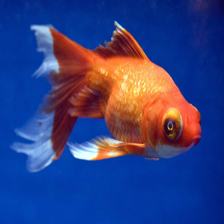

In [ ]:
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [ ]:
gold_fish = np.array(gold_fish)/255.0

In [ ]:
gold_fish

array([[[0.01176471, 0.16862745, 0.51372549],
        [0.01568627, 0.17254902, 0.51764706],
        [0.01960784, 0.17647059, 0.52156863],
        ...,
        [0.05490196, 0.01960784, 0.24313725],
        [0.07058824, 0.03921569, 0.2627451 ],
        [0.05882353, 0.02745098, 0.25098039]],

       [[0.00784314, 0.16470588, 0.50980392],
        [0.01176471, 0.16862745, 0.51372549],
        [0.01568627, 0.17254902, 0.51764706],
        ...,
        [0.05098039, 0.01960784, 0.24313725],
        [0.05490196, 0.02352941, 0.24705882],
        [0.05490196, 0.02352941, 0.24705882]],

       [[0.01176471, 0.16862745, 0.51372549],
        [0.01176471, 0.16862745, 0.51764706],
        [0.01176471, 0.16470588, 0.51372549],
        ...,
        [0.05098039, 0.01960784, 0.24705882],
        [0.05098039, 0.01960784, 0.24313725],
        [0.05098039, 0.01960784, 0.24313725]],

       ...,

       [[0.00392157, 0.23921569, 0.67058824],
        [0.00392157, 0.23921569, 0.67058824],
        [0.00392157, 0

In [ ]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [ ]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [ ]:
result

array([[ 0.24102995,  3.3292851 , 11.118843  , ..., -2.3770516 ,
         0.2789538 ,  0.1116343 ]], dtype=float32)

In [ ]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [ ]:
image_labels = []
with open("mobilenet_v2_labels.txt", 'r') as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [ ]:
image_labels[predicted_label_index]

'goldfish'

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)
data_dir

228827136/228813984 [==============================] - 1s 0us/step


'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/roses/3415176946_248afe9f32.jpg'),
 PosixPath('datasets/flower_photos/roses/21522100663_455b77a90c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/326541992_d542103ca8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16152205512_9d6cb80fb6.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4951581805_b049304f1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3415176946_248afe9f32.jpg'),
 PosixPath('datasets/flower_photos/roses/21522100663_455b77a90c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/326541992_d542103ca8_n.jpg')]

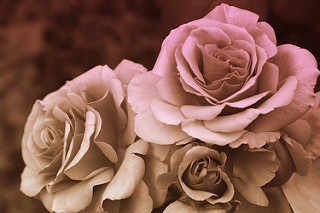

In [ ]:
Image.open(str(roses[3]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')), 
}

In [ ]:
flowers_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/3415176946_248afe9f32.jpg'),
 PosixPath('datasets/flower_photos/roses/21522100663_455b77a90c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/326541992_d542103ca8_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6125332325_b768e08bd9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8853083579_dd1dfa3188.jpg'),
 PosixPath('datasets/flower_photos/roses/15681454551_b6f73ce443_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16152205512_9d6cb80fb6.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/19566556880_476c66c5ee_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4951581805_b049304f1b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6803363808_9f9ce98186_m.jpg'),
 PosixPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),


In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [ ]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [ ]:
x, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name]) 

In [ ]:
x[0]/255

array([[[0.00392157, 0.15294118, 0.15686275],
        [0.00392157, 0.34117647, 0.28235294],
        [0.02745098, 0.48627451, 0.40392157],
        ...,
        [0.48627451, 0.16862745, 0.36078431],
        [0.49803922, 0.16862745, 0.35294118],
        [0.50980392, 0.18039216, 0.34117647]],

       [[0.00784314, 0.28627451, 0.25098039],
        [0.03137255, 0.46666667, 0.38823529],
        [0.05490196, 0.55294118, 0.47058824],
        ...,
        [0.49411765, 0.16862745, 0.35686275],
        [0.49803922, 0.17254902, 0.34901961],
        [0.4745098 , 0.16470588, 0.32156863]],

       [[0.03529412, 0.41960784, 0.34901961],
        [0.06666667, 0.54509804, 0.45098039],
        [0.09803922, 0.59215686, 0.51372549],
        ...,
        [0.45490196, 0.15294118, 0.32156863],
        [0.45490196, 0.14901961, 0.31372549],
        [0.41176471, 0.13333333, 0.28235294]],

       ...,

       [[0.56078431, 0.55686275, 0.50980392],
        [0.6       , 0.60784314, 0.52156863],
        [0.60392157, 0

In [ ]:
x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

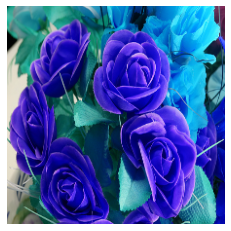

In [ ]:
plt.axis('off')
plt.imshow(x[0])

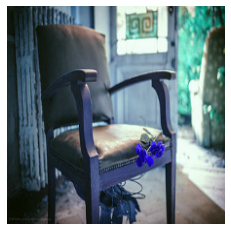

In [ ]:
plt.axis('off')
plt.imshow(x[10])

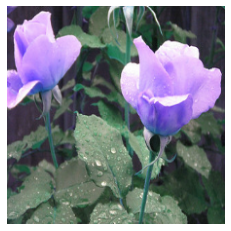

In [ ]:
plt.axis('off')
plt.imshow(x[100])

In [ ]:
predicted = classifier.predict(np.array([x[0], x[1], x[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([722, 795, 795])

In [ ]:
image_labels[722]

'pillow'

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, 
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 68s 742ms/step - loss: 0.7766 - accuracy: 0.7177
Epoch 2/5
86/86 [==============================] - 64s 739ms/step - loss: 0.4054 - accuracy: 0.8557
Epoch 3/5
86/86 [==============================] - 63s 737ms/step - loss: 0.3191 - accuracy: 0.8957
Epoch 4/5
86/86 [==============================] - 63s 738ms/step - loss: 0.2667 - accuracy: 0.9168
Epoch 5/5
86/86 [==============================] - 64s 740ms/step - loss: 0.2349 - accuracy: 0.9310


In [ ]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 24s 767ms/step - loss: 0.3510 - accuracy: 0.8834


[0.35099324584007263, 0.8834422826766968]